In [1]:
import pandas as pd 

data = pd.read_excel("reckard.xlsx", sep = '\t') 
recession = pd.read_excel("reckard.xlsx", sep = '\t', sheet_name  = 'rec') 
recession.head()

,Week,"""Recession"""
0,2016-01-17,49
1,2016-01-24,40
2,2016-01-31,49
3,2016-02-07,55
4,2016-02-14,39


In [2]:
#Replace string values "<1" with 0
data.iloc[:,1].replace(['<1',0],inplace=True)

In [3]:
data['"Kardashian"'].head()

0    29
1    40
2    37
3    32
4    38
Name: "Kardashian", dtype: int64

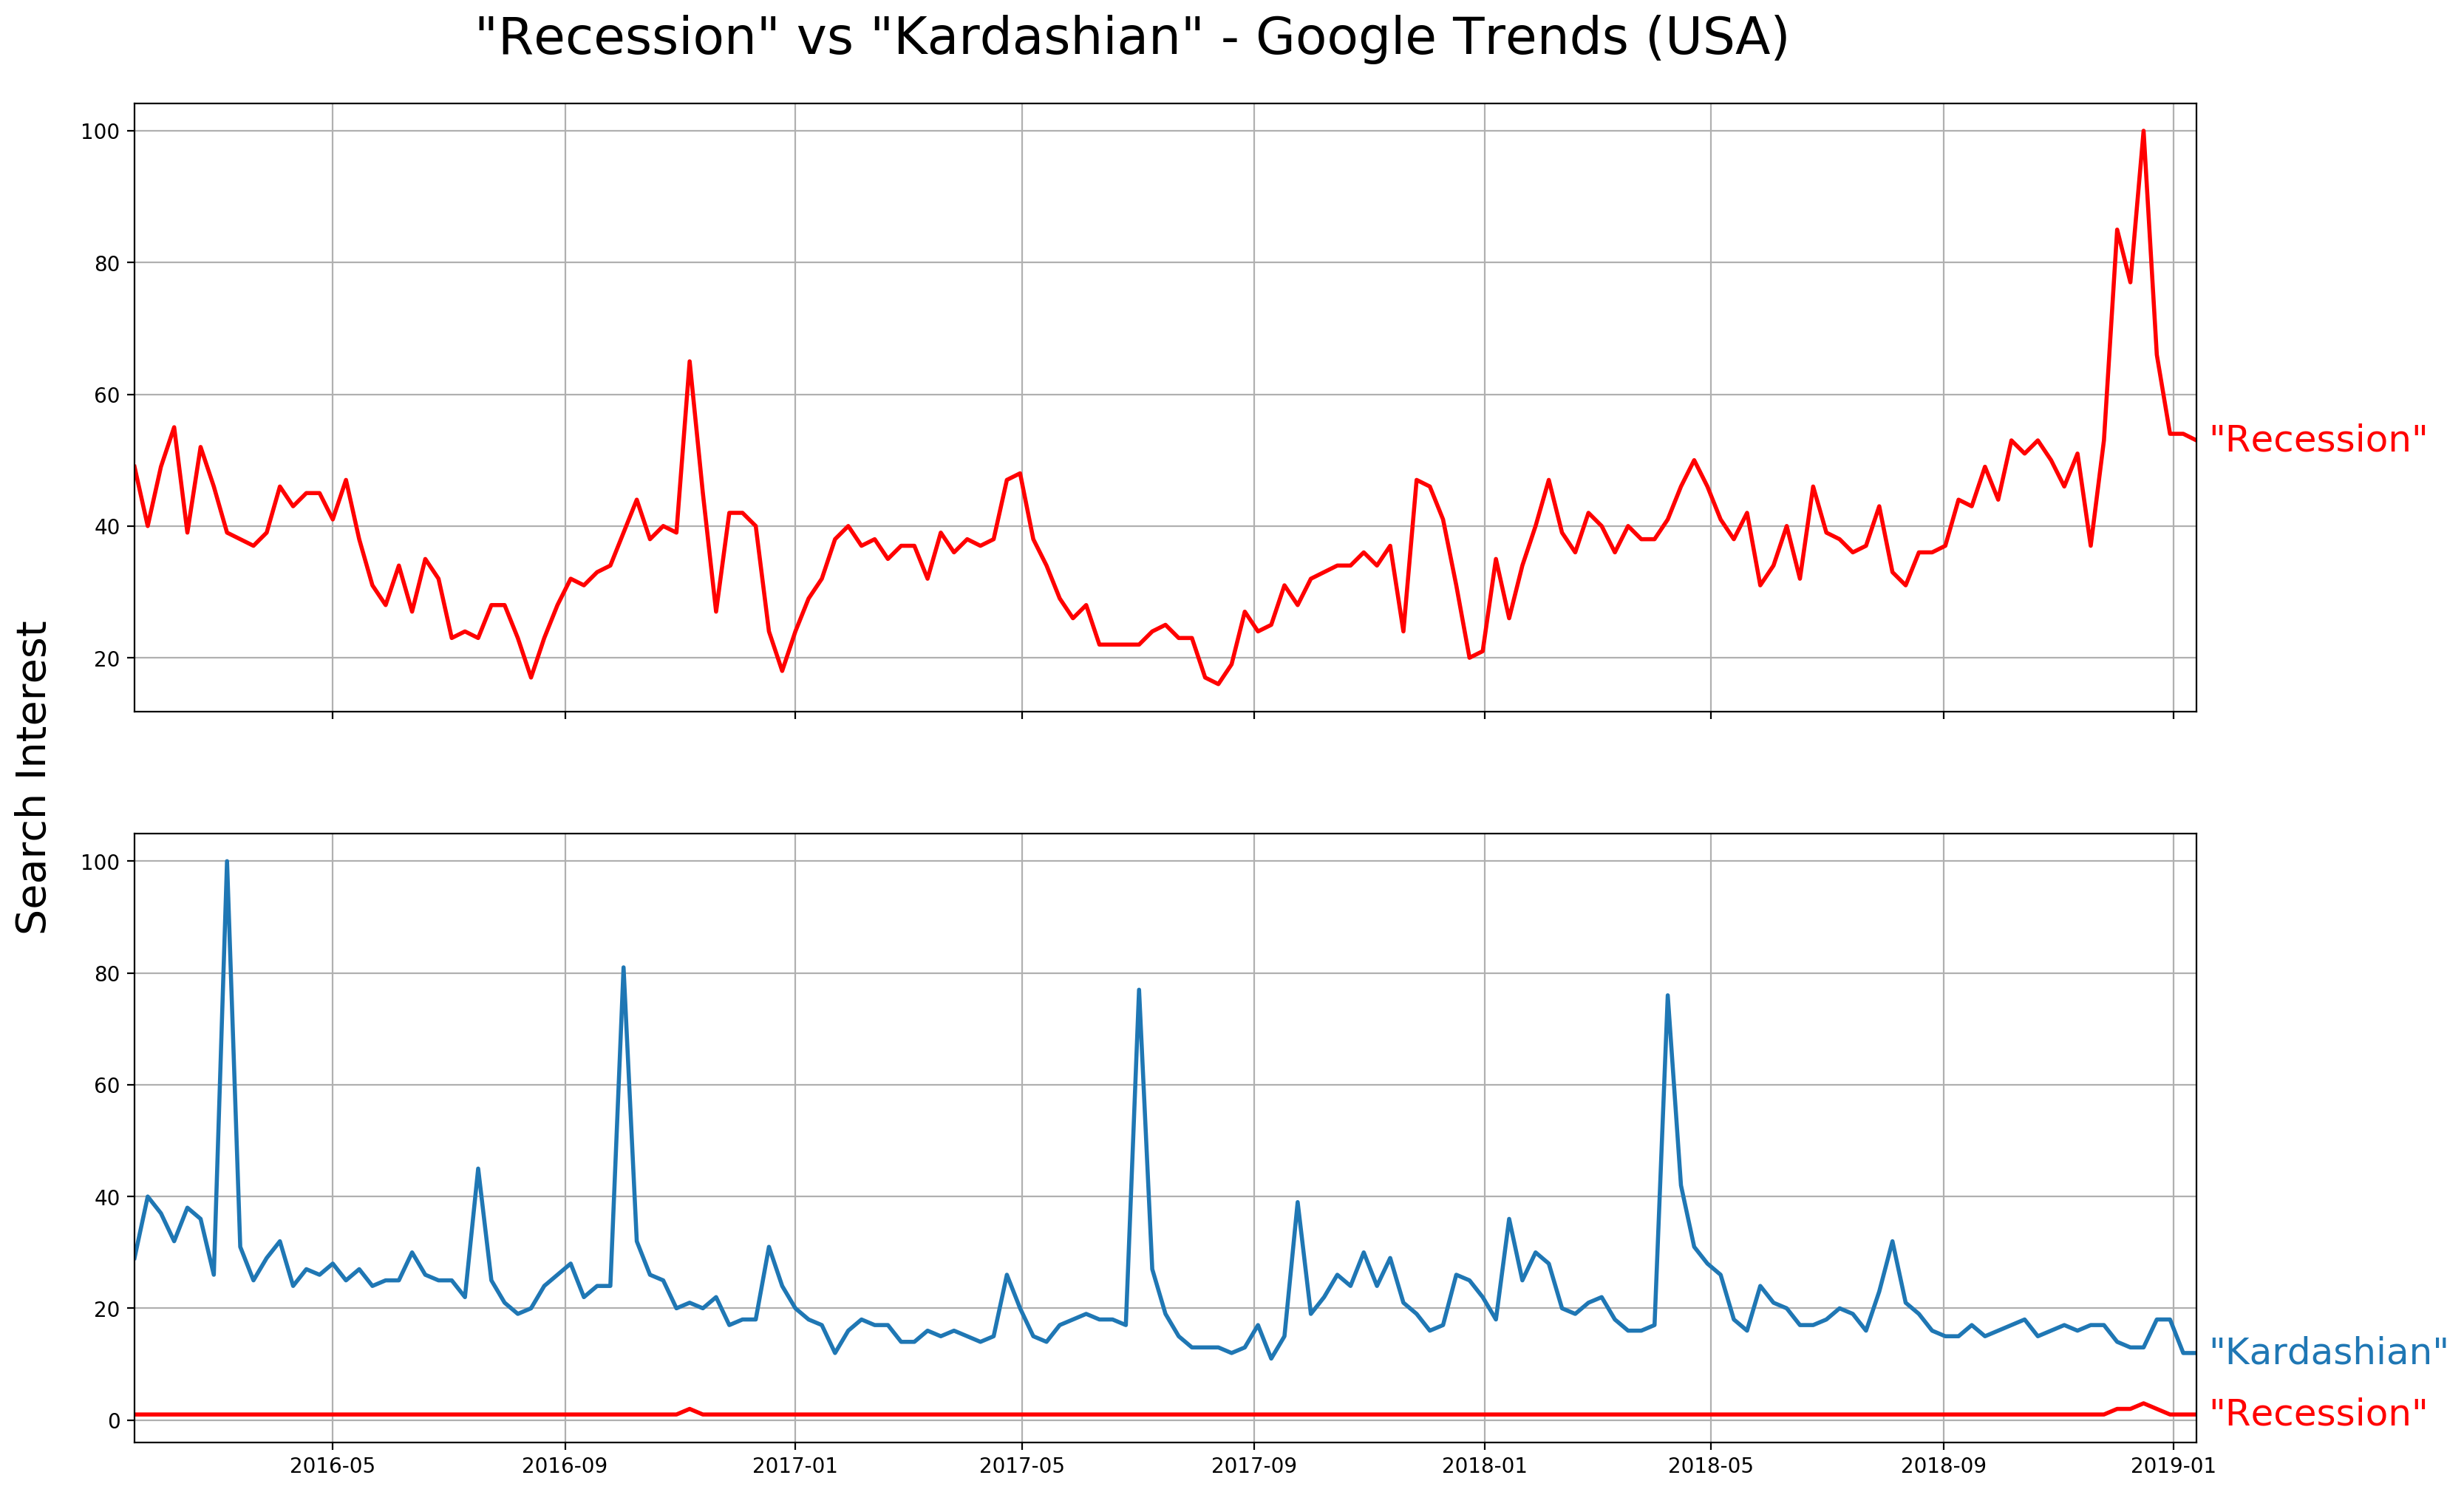

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fig=plt.figure(figsize=(18,12), dpi=200, facecolor='w')

fig.suptitle('"Recession" vs "Kardashian" - Google Trends (USA)', fontsize=25, y=0.93) 

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(pd.to_datetime(recession.Week, format='%Y-%m-%d'), recession['"Recession"'], label='"Recession"', color='r',
        linewidth=2)
fig.text(0.08, 0.5, 'Search Interest', fontsize=20, va='center', rotation='vertical')



ax2.plot(pd.to_datetime(data.Week, format='%Y-%m-%d'), data['"Kardashian"'], label='"Kardashian"', 
         linewidth=2)
ax2.plot(pd.to_datetime(data.Week, format='%Y-%m-%d'), data['"Recession"'], label='"Recession"', color='r',
        linewidth=2)


for line, name in zip(ax1.lines, data.iloc[:,1:2].columns):
    y = line.get_ydata()[-1]
    ax1.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax1.get_yaxis_transform(), textcoords="offset points",
                size=18, va="center")
    
for line, name in zip(ax2.lines, data[['"Kardashian"','"Recession"']].columns):
    y = line.get_ydata()[-1]
    ax2.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax2.get_yaxis_transform(), textcoords="offset points",
                size=18, va="center")
ax1.set_xlim(xmin='2016-01-17', xmax='2019-01-13')    
ax2.set_xlim(xmin='2016-01-17', xmax='2019-01-13')    


ax1.patch.set_facecolor('w')
ax2.patch.set_facecolor('w')

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
ax1.grid()
ax2.grid()
#plt.savefig('output.jpg')

plt.show()